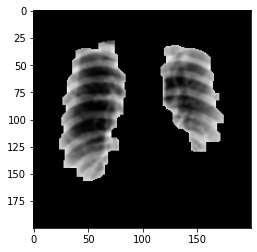

In [53]:
from skimage.io import imread
from matplotlib import pyplot as plt

root_dir = 'preprocessed/'
img_dir = 'masked_images/'
mask_dir = 'masks/'

idx = 1

features = {
    'area': [],
    'perimeter': [],
    'eccentricity': [],
    'major axis': [],
    'minor axis': [],
    'contrast': [],
    'homogeneity': [],
    'energy': [],
    'correlation': [],
    'entropy': [],
    'uniformity': [],
}

img_loc = f'{root_dir}{img_dir}{idx}.png'
mask_loc = f'{root_dir}{mask_dir}{idx}.png'

img = imread(img_loc, as_gray=True)
mask = imread(mask_loc, as_gray=True)

plt.imshow(img, cmap=plt.cm.gray)

In [54]:
# shape based features
from skimage.measure import regionprops

prop = regionprops(mask)[0]

features['area'].append( prop['area'] )
features['perimeter'].append( prop['perimeter'] )
features['eccentricity'].append( prop['eccentricity'] )
features['major axis'].append( prop['major_axis_length'] )
features['minor axis'].append( prop['minor_axis_length'] )

features

{'area': [9469],
 'perimeter': [659.3624817342638],
 'eccentricity': [0.7931411693772248],
 'major axis': [190.8142572864498],
 'minor axis': [116.21310229799069],
 'contrast': [],
 'homogeneity': [],
 'energy': [],
 'correlation': [],
 'entropy': [],
 'uniformity': []}

In [55]:
# glcm texture based features
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte

glcm = greycomatrix(img_as_ubyte(img), [1], [0], symmetric=True)

features['contrast'].append( greycoprops(glcm, prop='contrast')[0][0] )
features['homogeneity'].append( greycoprops(glcm, prop='homogeneity')[0][0] )
features['energy'].append( greycoprops(glcm, prop='energy')[0][0] )
features['correlation'].append( greycoprops(glcm, prop='correlation')[0][0] )

features

{'area': [9469],
 'perimeter': [659.3624817342638],
 'eccentricity': [0.7931411693772248],
 'major axis': [190.8142572864498],
 'minor axis': [116.21310229799069],
 'contrast': [122.14698492462311],
 'homogeneity': [0.8126801625213264],
 'energy': [0.7570111520870966],
 'correlation': [0.923784189124866],
 'entropy': [],
 'uniformity': []}

In [56]:
#other texture based features
from skimage.measure import shannon_entropy
from skimage.measure import moments

# entropy
features['entropy'].append( shannon_entropy(img) )

# skewness, total mean, variance
# raw moments are NOT translation, rotation, and scale invariant (might change this later)
#moments(img)

# SD = square root of second moment


# skewness = third moment / SD^3

features

{'area': [9469],
 'perimeter': [659.3624817342638],
 'eccentricity': [0.7931411693772248],
 'major axis': [190.8142572864498],
 'minor axis': [116.21310229799069],
 'contrast': [122.14698492462311],
 'homogeneity': [0.8126801625213264],
 'energy': [0.7570111520870966],
 'correlation': [0.923784189124866],
 'entropy': [2.3853919853561836],
 'uniformity': []}

In [57]:
import numpy as np

# Source: https://stackoverflow.com/questions/30851024/matlab-how-to-calculate-uniformity-of-an-image?rq=1
# Uniformity

def uniformity(img):
    intensity_lvls = np.unique(img) # Get all intensity levels
    numel = intensity_lvls.size # Number of intensity levels
    return numel

features['uniformity'].append( uniformity(img) )

In [58]:
import pandas as pd

df = pd.DataFrame.from_dict(features)
df

,area,perimeter,eccentricity,major axis,minor axis,contrast,homogeneity,energy,correlation,entropy,uniformity
0,9469,659.362482,0.793141,190.814257,116.213102,122.146985,0.81268,0.757011,0.923784,2.385392,123
